In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns # -> A plotting library
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [3]:
Loan_data = pd.read_csv("loan_data_set.csv")
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
type(Loan_data)

pandas.core.frame.DataFrame

In [5]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
Loan_data.shape

(614, 13)

In [7]:
Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
Loan_data = Loan_data.dropna()

In [9]:
Loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
Loan_data.replace({"Loan_Status":{"Y":1 , "N":0}} ,inplace = True)

C:\Users\balaj\AppData\Local\Temp\ipykernel_21080\3108606879.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_data.replace({"Loan_Status":{"Y":1 , "N":0}} ,inplace = True)


In [11]:
Loan_data.shape

(480, 13)

In [12]:
Loan_data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
Loan_data = Loan_data.replace(to_replace = '3+' , value= 4)  

In [14]:
Loan_data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

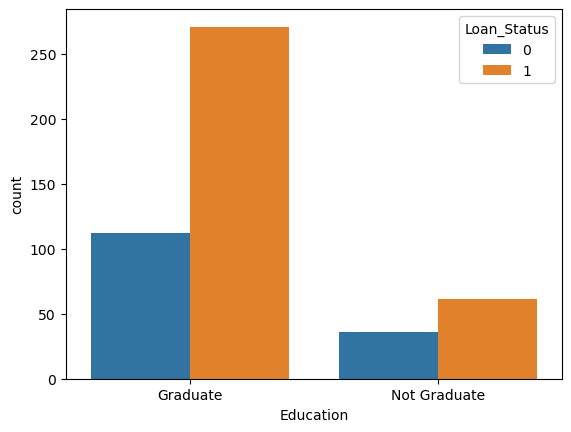

In [15]:
sns.countplot(x= "Education" , hue="Loan_Status" , data=Loan_data)

<Axes: xlabel='Gender', ylabel='count'>

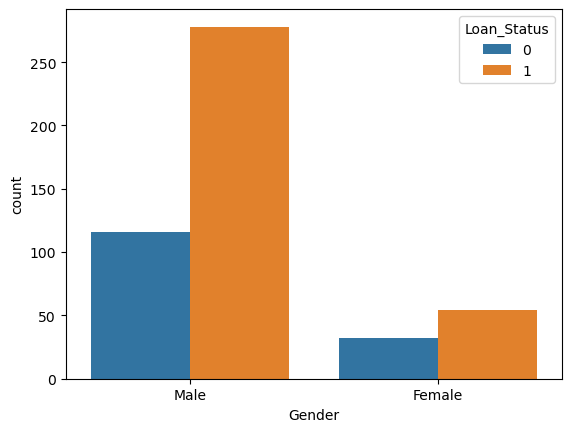

In [16]:
# -> matrial status & Loan status
sns.countplot(x= "Gender" , hue="Loan_Status" , data=Loan_data)

In [17]:
# -> Convert categorical data to numerical values
Loan_data= Loan_data.replace(
    {'Married': {'Yes': 1, 'No': 0},
     'Education': {'Graduate': 1, 'Not Graduate': 0},
     'Self_Employed': {'Yes': 1, 'No': 0},
     'Gender': {'Male': 1, 'Female': 0},
     'Property_Area': {'Semiurban': 1, 'Rural': 0, 'Urban': 2}},
)

C:\Users\balaj\AppData\Local\Temp\ipykernel_21080\1730726895.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_data= Loan_data.replace(


In [18]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# -> Separating the label and data 
x = Loan_data.drop(columns =["Loan_ID","Loan_Status"] , axis =1)
y = Loan_data['Loan_Status']

In [20]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , stratify= y, random_state = 2) 

In [22]:
print(x.shape , x_train.shape , x_test.shape)

(480, 11) (432, 11) (48, 11)


In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
x_train_prediction = classifier.predict(x_train)

In [27]:
training_data_accuracy = accuracy_score(x_train_prediction ,y_train)
print("Accuracy score of the training data", training_data_accuracy)

Accuracy score of the training data 0.7986111111111112


In [28]:
x_test_prediction = classifier.predict(x_test)

In [29]:
test_data_accuracy = accuracy_score(x_test_prediction ,y_test)
print("Accuracy score of the test data", test_data_accuracy)

Accuracy score of the test data 0.8333333333333334


In [30]:
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)

input_data_as_numby_array = np.asarray(input_data)

input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshape)
print(prediction)


# prediction[0] ->= Because prediction is a list [0] first element in the list

if (prediction[0]== 0):
    print("Not Approved")
else :
    print("Approved") 

[0]
Not Approved


C:\Users\balaj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
import joblib

# Assuming `svc_pipeline` is your trained pipeline with 11 features
joblib.dump(classifier, "svc_model_11_features.pkl")


['svc_model_11_features.pkl']